# data-scientist-exercise01

Primary References:
- https://www.datacamp.com/community/tutorials/decision-tree-classification-python
- http://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example
- https://www.geeksforgeeks.org/how-to-get-column-names-in-pandas-dataframe/
- https://www.geeksforgeeks.org/confusion-matrix-machine-learning/ 
- StackOverflow
- StackExchange
- ect.

### 4. Import the "flattened" table (or CSV file) into your open source analytic environment of choice (R, Python, Java, etc.) and stage it for analysis.

In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import sys
!{sys.executable} -m pip install pydotplus
import sys
!{sys.executable} -m pip install graphviz
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore') 

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
mydata= "flattenedRecords.csv"
df = pd.read_csv(mydata) 
df.head()
df.columns
#df.isnull().sum()

Index(['id', 'age', 'workClass', 'eduLevel', 'eduNum', 'maritalStatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalGain',
       'capitalLoss', 'hoursPerWeek', 'country', 'over50K'],
      dtype='object')

### 6. Split the data into training, validation, and test data sets.

In [3]:
#what is the current # of 0 and 1 in column
(df['over50K'].value_counts()/df['over50K'].count())*100

0    76.071823
1    23.928177
Name: over50K, dtype: float64

In [4]:
# converting all '?' to NaN
df = df.mask(df=='?', float('NaN'))

#SKLearn only takes # so I have to change all of the Strings to #
# use pd.concat to join the new columns with your original dataframe
df = pd.concat([df,pd.get_dummies(df['workClass'], prefix='workClass')],axis=1)
df = pd.concat([df,pd.get_dummies(df['eduLevel'], prefix='eduLevel')],axis=1)
df = pd.concat([df,pd.get_dummies(df['maritalStatus'], prefix='maritalStatus')],axis=1)
df = pd.concat([df,pd.get_dummies(df['occupation'], prefix='occupation')],axis=1)
df = pd.concat([df,pd.get_dummies(df['relationship'], prefix='relationship')],axis=1)
df = pd.concat([df,pd.get_dummies(df['race'], prefix='race')],axis=1)
df = pd.concat([df,pd.get_dummies(df['sex'], prefix='sex')],axis=1)
df = pd.concat([df,pd.get_dummies(df['country'], prefix='country')],axis=1)
                     
# get rid of the original column
df.drop(['workClass'],axis=1, inplace=True)
df.drop(['eduLevel'],axis=1, inplace=True)
df.drop(['maritalStatus'],axis=1, inplace=True)
df.drop(['occupation'],axis=1, inplace=True)
df.drop(['relationship'],axis=1, inplace=True)
df.drop(['race'],axis=1, inplace=True)
df.drop(['sex'],axis=1, inplace=True)
df.drop(['country'],axis=1, inplace=True)

#show all column names
for col in df.columns: 
    print(col) 

id
age
eduNum
capitalGain
capitalLoss
hoursPerWeek
over50K
workClass_Federal-gov
workClass_Local-gov
workClass_Never-worked
workClass_Private
workClass_Self-emp-inc
workClass_Self-emp-not-inc
workClass_State-gov
workClass_Without-pay
eduLevel_10th
eduLevel_11th
eduLevel_12th
eduLevel_1st-4th
eduLevel_5th-6th
eduLevel_7th-8th
eduLevel_9th
eduLevel_Assoc-acdm
eduLevel_Assoc-voc
eduLevel_Bachelors
eduLevel_Doctorate
eduLevel_HS-grad
eduLevel_Masters
eduLevel_Preschool
eduLevel_Prof-school
eduLevel_Some-college
maritalStatus_Divorced
maritalStatus_Married-AF-spouse
maritalStatus_Married-civ-spouse
maritalStatus_Married-spouse-absent
maritalStatus_Never-married
maritalStatus_Separated
maritalStatus_Widowed
occupation_Adm-clerical
occupation_Armed-Forces
occupation_Craft-repair
occupation_Exec-managerial
occupation_Farming-fishing
occupation_Handlers-cleaners
occupation_Machine-op-inspct
occupation_Other-service
occupation_Priv-house-serv
occupation_Prof-specialty
occupation_Protective-serv


In [5]:
#split dataset in target and other
target = ['over50K']

other = ['id', 'age', 'eduNum', 'capitalGain', 'capitalLoss', 'hoursPerWeek',
         'workClass_Federal-gov', 'workClass_Local-gov',
       'workClass_Never-worked', 'workClass_Private', 'workClass_Self-emp-inc',
       'workClass_Self-emp-not-inc', 'workClass_State-gov',
       'workClass_Without-pay', 'eduLevel_10th', 'eduLevel_11th',
       'eduLevel_12th', 'eduLevel_1st-4th', 'eduLevel_5th-6th',
       'eduLevel_7th-8th', 'eduLevel_9th', 'eduLevel_Assoc-acdm',
       'eduLevel_Assoc-voc', 'eduLevel_Bachelors', 'eduLevel_Doctorate',
       'eduLevel_HS-grad', 'eduLevel_Masters', 'eduLevel_Preschool',
       'eduLevel_Prof-school', 'eduLevel_Some-college',
       'maritalStatus_Divorced', 'maritalStatus_Married-AF-spouse',
       'maritalStatus_Married-civ-spouse',
       'maritalStatus_Married-spouse-absent', 'maritalStatus_Never-married',
       'maritalStatus_Separated', 'maritalStatus_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'sex_Female', 'sex_Male','country_Cambodia', 'country_Canada','country_China',
         'country_Columbia','country_Cuba','country_Dominican-Republic','country_Ecuador','country_El-Salvador',
         'country_England','country_France','country_Germany','country_Greece','country_Guatemala','country_Haiti',
         'country_Holand-Netherlands','country_Honduras','country_Hong','country_Hungary','country_India','country_Iran',
         'country_Ireland','country_Italy','country_Jamaica','country_Japan','country_Laos','country_Mexico','country_Nicaragua',
         'country_Outlying-US(Guam-USVI-etc)','country_Peru','country_Philippines','country_Poland','country_Portugal','country_Puerto-Rico', 'country_Scotland',
       'country_South', 'country_Taiwan', 'country_Thailand',
       'country_Trinadad&Tobago', 'country_United-States', 'country_Vietnam',
       'country_Yugoslavia']

X = df[other]
y = df[target] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1) # 50% training and 20% test
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state=2)# 50% training and 20% Validation

#CHECK We expect the training features number of columns to match the testing feature number of columns and the number of rows to match for the respective training and testing features and the labels
print('X_train Shape of XTrain:', X_train.shape)
print('y_train Shape of YTrain:', y_train.shape)
print('X_test Shape of XTest:', X_test.shape)
print('y_test Shape of YTest:', y_test.shape)
print('Shape of XValidation:', X_validation.shape)
print('Shape of YValidation:', y_validation.shape)

X_train Shape of XTrain: (31258, 105)
y_train Shape of YTrain: (31258, 1)
X_test Shape of XTest: (9769, 105)
y_test Shape of YTest: (9769, 1)
Shape of XValidation: (7815, 105)
Shape of YValidation: (7815, 1)


### 7. Develop a model that predicts whether individuals, based on the census variables provided, make over $50,000/year. Use over_50k as the target variable.

Confusion Matrix :
[[6445  985]
 [ 862 1477]] 

Accuracy: 0.8109325417135838 

Report : 
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      7430
           1       0.60      0.63      0.62      2339

    accuracy                           0.81      9769
   macro avg       0.74      0.75      0.74      9769
weighted avg       0.81      0.81      0.81      9769

[1.87627762e-01 1.16866090e-01 1.06904208e-01 1.06304000e-01
 4.00665362e-02 6.64923844e-02 4.59294754e-03 5.24461360e-03
 0.00000000e+00 1.13585449e-02 4.97500635e-03 6.46606332e-03
 5.33706551e-03 1.17661042e-04 1.25505112e-04 6.49472199e-04
 7.12867537e-04 4.73445622e-05 1.40489101e-04 6.44239153e-06
 1.80245011e-04 9.77794282e-04 2.28824778e-03 2.08658980e-03
 5.87768952e-04 4.88121229e-03 1.50708489e-03 0.00000000e+00
 5.83809543e-04 3.40989331e-03 2.58850449e-03 7.33748429e-04
 1.98184544e-01 6.38261639e-04 2.63857922e-03 1.11408182e-03
 9.36487950e-04 6.23343637e-03 1.35

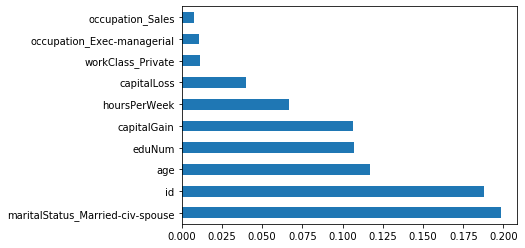

In [7]:
# Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#ValueError: could not convert string to float: '?' 
    #for this reason I will now convert
    
results = confusion_matrix(y_test, y_pred) 
print('Confusion Matrix :')
print(results,"\n") 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred),"\n")
print('Report : ')
print(classification_report(y_test, y_pred))

print(clf.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Confusion Matrix :
[[7043  387]
 [ 989 1350]] 

Accuracy: 0.8591462790459617 

Report : 
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7430
           1       0.78      0.58      0.66      2339

    accuracy                           0.86      9769
   macro avg       0.83      0.76      0.79      9769
weighted avg       0.85      0.86      0.85      9769

[6.72661489e-03 7.12586176e-02 1.66859174e-01 2.15990091e-01
 6.10601181e-02 3.67176956e-02 2.55706587e-04 6.52496573e-04
 0.00000000e+00 1.25538579e-03 0.00000000e+00 3.82072492e-03
 2.89042644e-04 0.00000000e+00 0.00000000e+00 3.95277257e-04
 0.00000000e+00 0.00000000e+00 4.72946193e-04 2.34268558e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.34268558e-04
 0.00000000e+00 3.40149727e-04 0.00000000e+00 0.00000000e+00
 2.88695613e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.04357899e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.28687028e-03 0.00

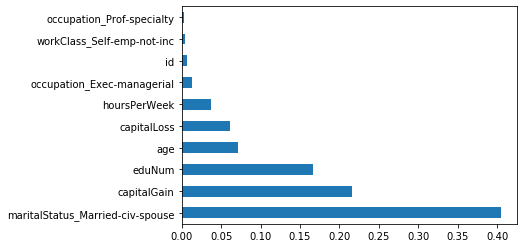

In [8]:
# BETTER Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=9)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

results = confusion_matrix(y_test, y_pred) 
print('Confusion Matrix :')
print(results,"\n") 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred),"\n")
print('Report : ')
print(classification_report(y_test, y_pred))

print(clf.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [9]:
#print(dict(zip(X_test.columns, clf.feature_importances_)))

id = 0.006726614891113776
age = 0.07125861757957537
eduNum = 0.166859174271022
capitalGain = 0.21599009122471916
capitalLoss = 0.06106011812453398
hoursPerWeek = 0.03671769557111641
workClass_Federal-gov = 0.00025570658723093637
workClass_Local-gov = 0.0006524965733029735
workClass_Never-worked = 0.0
workClass_Private = 0.0012553857856561
workClass_Self-emp-inc = 0.0
workClass_Self-emp-not-inc = 0.003820724919031366
workClass_State-gov = 0.0002890426438972219
workClass_Without-pay = 0.0
eduLevel_10th = 0.0
eduLevel_11th = 0.00039527725705664456
eduLevel_12th = 0.0
eduLevel_1st-4th = 0.0
eduLevel_5th-6th = 0.00047294619292316824
eduLevel_7th-8th = 0.0002342685578440101
eduLevel_9th = 0.0
eduLevel_Assoc-acdm = 0.0
eduLevel_Assoc-voc = 0.0
eduLevel_Bachelors = 0.0002342685578440101
eduLevel_Doctorate = 0.0
eduLevel_HS-grad = 0.0003401497268545946
eduLevel_Masters = 0.0
eduLevel_Preschool = 0.0
eduLevel_Prof-school = 0.0002886956133083458
eduLevel_Some-college = 0.0
maritalStatus_Divorced 

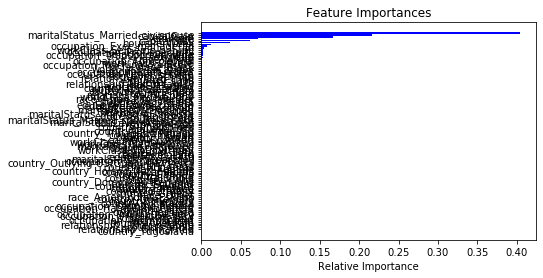

In [10]:
for name, importance in zip(df[other], clf.feature_importances_):
    print(name, "=", importance)

importances = clf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [other[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Confusion Matrix :
[[6882  548]
 [ 887 1452]] 

Accuracy: 0.8531067663015662 

Report : 
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7430
           1       0.73      0.62      0.67      2339

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769

[1.64910849e-01 1.51254724e-01 5.46544678e-02 9.74796557e-02
 2.99659907e-02 8.61153123e-02 5.26754495e-03 5.90515045e-03
 0.00000000e+00 1.12259951e-02 5.99282053e-03 8.72655763e-03
 4.70372803e-03 9.59715062e-05 1.53795277e-03 1.91022809e-03
 8.24642117e-04 2.67289786e-04 6.97532162e-04 1.81207988e-03
 1.33859648e-03 2.44793309e-03 3.08337841e-03 1.32465631e-02
 3.23582175e-03 7.25677725e-03 7.71627738e-03 3.47512693e-05
 5.16153450e-03 5.19136517e-03 5.54493423e-03 3.34007098e-04
 6.64162235e-02 8.39396387e-04 2.14956583e-02 1.62546770e-03
 1.42396466e-03 5.54548504e-03 1.24

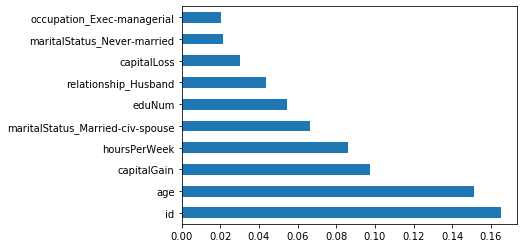

In [13]:
# Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

results = confusion_matrix(y_test, y_pred) 
print('Confusion Matrix :')
print(results,"\n") 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred),"\n")
print('Report : ')
print(classification_report(y_test, y_pred))

print(clf.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

id = 0.1649108486556256
age = 0.1512547239743515
eduNum = 0.05465446780941904
capitalGain = 0.09747965569526974
capitalLoss = 0.02996599073723066
hoursPerWeek = 0.08611531226259928
workClass_Federal-gov = 0.005267544952590815
workClass_Local-gov = 0.005905150447629556
workClass_Never-worked = 0.0
workClass_Private = 0.011225995082498169
workClass_Self-emp-inc = 0.005992820534361064
workClass_Self-emp-not-inc = 0.00872655762732319
workClass_State-gov = 0.004703728029946477
workClass_Without-pay = 9.597150624951183e-05
eduLevel_10th = 0.0015379527659875362
eduLevel_11th = 0.0019102280868193724
eduLevel_12th = 0.000824642116674303
eduLevel_1st-4th = 0.000267289786464024
eduLevel_5th-6th = 0.000697532162145324
eduLevel_7th-8th = 0.0018120798789740132
eduLevel_9th = 0.001338596477105614
eduLevel_Assoc-acdm = 0.002447933094598515
eduLevel_Assoc-voc = 0.003083378413013694
eduLevel_Bachelors = 0.01324656311875684
eduLevel_Doctorate = 0.003235821749270684
eduLevel_HS-grad = 0.007256777245752636

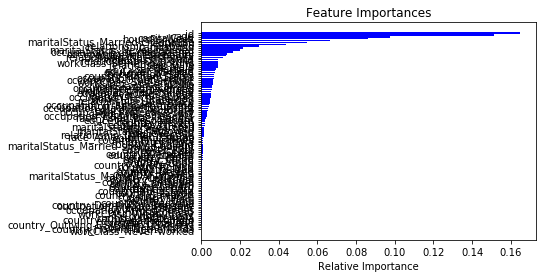

In [14]:
for name, importance in zip(df[other], clf.feature_importances_):
    print(name, "=", importance)

importances = clf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [other[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [15]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                               Specs         Score
3                        capitalGain  7.872878e+07
4                        capitalLoss  1.172107e+06
0                                 id  9.776095e+03
1                                age  7.682975e+03
5                       hoursPerWeek  6.253200e+03
32  maritalStatus_Married-civ-spouse  3.370525e+03
51              relationship_Husband  3.085344e+03
2                             eduNum  2.178715e+03
34       maritalStatus_Never-married  2.106158e+03
54            relationship_Own-child  1.338031e+03


[1.65037906e-01 1.51678774e-01 3.12531502e-02 7.44631111e-02
 2.20738155e-02 9.59906074e-02 5.38196053e-03 5.47650383e-03
 3.37701210e-07 1.00172158e-02 7.11321047e-03 7.77087691e-03
 4.77108173e-03 1.23950842e-04 1.77019649e-03 2.05091445e-03
 1.17826337e-03 2.56008804e-04 1.13910845e-03 3.11040767e-03
 2.02692277e-03 2.47965942e-03 3.08645437e-03 1.72292262e-02
 4.58889091e-03 9.40367424e-03 1.07595286e-02 5.32130358e-05
 5.80193409e-03 5.50909375e-03 8.11725768e-03 3.20919583e-04
 6.00874674e-02 7.31564930e-04 1.80425301e-02 1.39477989e-03
 1.82561375e-03 5.46161096e-03 4.97033350e-05 5.45788654e-03
 2.63024127e-02 3.85838396e-03 3.10240010e-03 3.66234989e-03
 6.96587308e-03 1.01214440e-04 2.09995712e-02 3.03816278e-03
 6.26776475e-03 4.78730538e-03 4.11195185e-03 6.66673807e-02
 1.32253239e-02 2.10100142e-03 1.27736023e-02 3.25116388e-03
 6.63999422e-03 1.43999079e-03 3.05350416e-03 4.42860020e-03
 1.07541456e-03 6.35487331e-03 1.27492874e-02 2.71664398e-03
 3.78670058e-04 1.537611

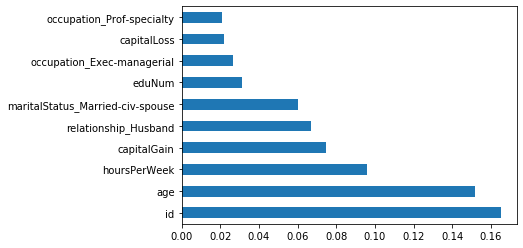

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()